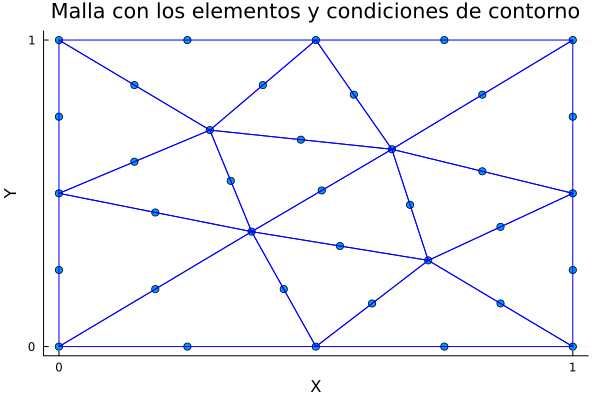

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0s, CPU 0s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0s, CPU 0s)
Info    : 12 nodes 26 elements
Info    : Meshing order 2 (curvilinear on)...
Info    : [  0%] Meshing curve 1 order 2
Info    : [ 20%] Meshing curve 2 order 2
Info    : [ 40%] Meshing curve 3 order 2
Info    : [ 60%] Meshing curve 4 order 2
Info    : [ 80%] Meshing surface 1 order 2
Info    : Surface mesh: worst distortion = 1 (0 elements in ]0, 0.2]); worst gamma = 0.890164
Info    : Done meshing order 2 (Wall 0s, CPU 0s)
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00099

Main.Mesh_plot

In [1]:
module Mesh_plot
include("Mesh_object.jl")

using Plots

coord = Mesh_object.mesh_coord_2D
elements = Mesh_object.mesh_elements
b_conditions = Mesh_object.mesh_cond
order = 0

# Variable para cambiar de mallas triangulares a mallas cuadradas
quad_meshes = Mesh_object.quadrangular_meshes;

# Extraemos todas las coordenadas x e y separadas
coord_x = [coord[i] for i in 1:2:length(coord)]
coord_y = [coord[i] for i in 2:2:length(coord)]

# Encontramos los valores minimos y maximos de x e y
min_x = minimum(coord_x)
max_x = maximum(coord_x)
min_y = minimum(coord_y)
max_y = maximum(coord_y)

# Creamos un rango de valores para los ejes x e y con una separacion de 1 punto
x_range = min_x:1:max_x
y_range = min_y:1:max_y

# Plot variables
plot_results = plot()
title!(plot_results, "Malla con los elementos y condiciones de contorno")
xlabel!(plot_results, "x")
ylabel!(plot_results, "y")

# Creamos un grafico de dispersion
scatter!(coord_x, coord_y, legend=false, xlabel="X", ylabel="Y", xticks=x_range, yticks=y_range)

# Iteramos a traves de los elementos para pintarlos
for element in elements
    element_nodes = element.nodes
    order = element.order

    # Filtrar solo los nodos que son los vertices del triangulo o cuadrilatero
    if quad_meshes == false
        # Dibujamos los triangulos
        vertex_nodes = element_nodes[1:3]
    else
        # Dibujamos los cuadrilateros
        vertex_nodes = element_nodes[1:4]
    end
    

    # Dibuja un triangulo utilizando solo los nodos de los vertices
    x = [coord[node * 2 - 1] for node in vertex_nodes]
    y = [coord[node * 2] for node in vertex_nodes]

    # Dibuja los elementos
    if length(vertex_nodes) == 3
        plot!(x, y, seriestype = :shape, linecolor = :blue, fillalpha = 0)
    elseif length(vertex_nodes) == 4
        plot!(x, y, seriestype = :shape, linecolor = :blue, fillalpha = 0)
    end
end

# Iteramos a traves de las aristas con condicion de contorno para pintarlas
for element in elements
    nodes = element.nodes
    b_edges = element.boundary_egdes
    if quad_meshes == false
        if b_edges[1] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[2] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[2] * 2]]
            for b_cond in b_conditions
                if b_edges[1] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[2] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[3] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[3] * 2]]
            for b_cond in b_conditions
                if b_edges[2] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[3] != 0
            x = [coord[nodes[2] * 2 - 1], coord[nodes[3] * 2 - 1]]
            y = [coord[nodes[2] * 2], coord[nodes[3] * 2]]
            for b_cond in b_conditions
                if b_edges[3] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
    else
        if b_edges[1] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[2] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[2] * 2]]
            for b_cond in b_conditions
                if b_edges[1] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[2] != 0
            x = [coord[nodes[2] * 2 - 1], coord[nodes[3] * 2 - 1]]
            y = [coord[nodes[2] * 2], coord[nodes[3] * 2]]
            for b_cond in b_conditions
                if b_edges[2] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[3] != 0
            x = [coord[nodes[3] * 2 - 1], coord[nodes[4] * 2 - 1]]
            y = [coord[nodes[3] * 2], coord[nodes[4] * 2]]
            for b_cond in b_conditions
                if b_edges[3] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[4] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[4] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[4] * 2]]
            for b_cond in b_conditions
                if b_edges[4] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
    end
end

# Mostramos el gráfico de dispersion
display(plot_results)

end

In [ ]:
module Mesh_plot
include("Mesh_object.jl")

using Plots

coord = Mesh_object.mesh_coord_2D
elements = Mesh_object.mesh_elements
b_conditions = Mesh_object.mesh_cond
order = 0

# Variable para cambiar de mallas triangulares a mallas cuadradas
quad_meshes = Mesh_object.quadrangular_meshes;

# Extraemos todas las coordenadas x e y separadas
coord_x = [coord[i] for i in 1:2:length(coord)]
coord_y = [coord[i] for i in 2:2:length(coord)]

# Encontramos los valores minimos y maximos de x e y
min_x = minimum(coord_x)
max_x = maximum(coord_x)
min_y = minimum(coord_y)
max_y = maximum(coord_y)

# Creamos un rango de valores para los ejes x e y con una separacion de 1 punto
x_range = min_x:1:max_x
y_range = min_y:1:max_y

# Plot variables
plot_results = plot()
title!(plot_results, "Malla con los elementos y condiciones de contorno")
xlabel!(plot_results, "x")
ylabel!(plot_results, "y")

# Creamos un grafico de dispersion
scatter!(coord_x, coord_y, legend=false, xlabel="X", ylabel="Y", xticks=x_range, yticks=y_range)

# Iteramos a traves de los elementos para pintarlos
for element in elements
    element_nodes = element.nodes
    order = element.order

    # Filtrar solo los nodos que son los vertices del triangulo o cuadrilatero
    if quad_meshes == false
        # Dibujamos los triangulos
        vertex_nodes = element_nodes[1:3]
    else
        # Dibujamos los cuadrilateros
        vertex_nodes = element_nodes[1:4]
    end
    

    # Dibuja un triangulo utilizando solo los nodos de los vertices
    x = [coord[node * 2 - 1] for node in vertex_nodes]
    y = [coord[node * 2] for node in vertex_nodes]

    # Dibuja los elementos
    if length(vertex_nodes) == 3
        plot!(x, y, seriestype = :shape, linecolor = :blue, fillalpha = 0)
    elseif length(vertex_nodes) == 4
        plot!(x, y, seriestype = :shape, linecolor = :blue, fillalpha = 0)
    end
end

# Iteramos a traves de las aristas con condicion de contorno para pintarlas
for element in elements
    nodes = element.nodes
    b_edges = element.boundary_egdes
    if quad_meshes == false
        if b_edges[1] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[2] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[2] * 2]]
            for b_cond in b_conditions
                if b_edges[1] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[2] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[3] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[3] * 2]]
            for b_cond in b_conditions
                if b_edges[2] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[3] != 0
            x = [coord[nodes[2] * 2 - 1], coord[nodes[3] * 2 - 1]]
            y = [coord[nodes[2] * 2], coord[nodes[3] * 2]]
            for b_cond in b_conditions
                if b_edges[3] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
    else
        if b_edges[1] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[2] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[2] * 2]]
            for b_cond in b_conditions
                if b_edges[1] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[2] != 0
            x = [coord[nodes[2] * 2 - 1], coord[nodes[3] * 2 - 1]]
            y = [coord[nodes[2] * 2], coord[nodes[3] * 2]]
            for b_cond in b_conditions
                if b_edges[2] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[3] != 0
            x = [coord[nodes[3] * 2 - 1], coord[nodes[4] * 2 - 1]]
            y = [coord[nodes[3] * 2], coord[nodes[4] * 2]]
            for b_cond in b_conditions
                if b_edges[3] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
        if b_edges[4] != 0
            x = [coord[nodes[1] * 2 - 1], coord[nodes[4] * 2 - 1]]
            y = [coord[nodes[1] * 2], coord[nodes[4] * 2]]
            for b_cond in b_conditions
                if b_edges[4] == b_cond.id
                    if b_cond.type == Mesh_object.Boundary_cond.DIRICHLET
                        plot!(x, y, line=:solid, linecolor = :red, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.NEUMAN
                        plot!(x, y, line=:solid, linecolor = :black, fillalpha = 0, linewidth=3)
                    elseif b_cond.type == Mesh_object.Boundary_cond.CAUCHY
                        plot!(x, y, line=:solid, linecolor = :green, fillalpha = 0, linewidth=3)
                    end
                end
            end
        end
    end
end

# Mostramos el gráfico de dispersion
display(plot_results)

end